<img src= '../images/clean_data1.jpg'>

# Common data types
Manipulating and analyzing data with incorrect data types could lead to compromised analysis as you go along the data science workflow.

When working with new data, you should always check the data types of your columns using the `.dtypes` attribute or the `.info()` method which you'll see in the next exercise. Often times, you'll run into columns that should be converted to different data types before starting any analysis.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ride_sharing = pd.read_csv('../data/26. Limpiando datos/ride_sharing_new.csv')
ride_sharing

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male
...,...,...,...,...,...,...,...,...,...,...
25755,25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male
25756,25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male
25757,25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male
25758,25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male


In [3]:
# Print the information of ride_sharing
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
Unnamed: 0         25760 non-null int64
duration           25760 non-null object
station_A_id       25760 non-null int64
station_A_name     25760 non-null object
station_B_id       25760 non-null int64
station_B_name     25760 non-null object
bike_id            25760 non-null int64
user_type          25760 non-null int64
user_birth_year    25760 non-null int64
user_gender        25760 non-null object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB


In [4]:
# Print summary statistics of user_type column
ride_sharing['user_type'].describe()

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

In [6]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')
ride_sharing['user_type_cat'].describe()

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64

In [7]:
# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

## Summing strings and concatenating numbers

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In [8]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes') 

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

In [9]:
# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

In [11]:
# Print formed columns and calculate average ride duration 
ride_sharing[['duration','duration_trim','duration_time']]

,duration,duration_trim,duration_time
0,12 minutes,12,12
1,24 minutes,24,24
2,8 minutes,8,8
3,4 minutes,4,4
4,11 minutes,11,11
...,...,...,...
25755,11 minutes,11,11
25756,10 minutes,10,10
25757,14 minutes,14,14
25758,14 minutes,14,14


In [14]:
# Write an assert statement confirming the change
assert ride_sharing['duration_time'].dtype == 'int'

# Dropping duplicates
Removing duplicates is an essential skill to get accurate counts, because often you don't want to count the same thing multiple times. In this exercise, you'll create some new DataFrames using unique values from sales.

In [17]:
sales = pd.read_csv('../data/26. Limpiando datos/sales_subset.csv', index_col=0)
sales.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [3]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=["store", "type"])
store_types.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765


In [4]:
# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store", "department"])
store_depts.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
12,1,A,2,2010-02-05,50605.27,False,5.727778,0.679451,8.106
24,1,A,3,2010-02-05,13740.12,False,5.727778,0.679451,8.106
36,1,A,4,2010-02-05,39954.04,False,5.727778,0.679451,8.106
48,1,A,5,2010-02-05,32229.38,False,5.727778,0.679451,8.106


In [6]:
# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]].drop_duplicates(subset="date")

# Print date col of holiday_dates
holiday_dates[["date"]]

,date
498,2010-09-10
691,2011-11-25
2315,2010-02-12
6735,2012-09-07
6810,2010-12-31
6815,2012-02-10
6820,2011-09-09


# Finding consistency

In this exercise and throughout this chapter, you'll be working with the airlines DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named categories was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames

In [18]:
categories = pd.DataFrame({'cleanliness': {0: 'Clean',1: 'Average',2: 'Somewhat clean',3: 'Somewhat dirty',4: 'Dirty'},
                           'safety': {0: 'Neutral',1: 'Very safe',2: 'Somewhat safe',3: 'Very unsafe',4: 'Somewhat unsafe'},
                           'satisfaction': {0: 'Very satisfied',1: 'Neutral',2: 'Somewhat satisfied',3: 'Somewhat unsatisfied',4: 'Very unsatisfied'}})
categories

,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [19]:
airlines = pd.read_csv('../data/26. Limpiando datos/airlines_final.csv', index_col=0)
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


In [22]:
# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(),"\n")

Cleanliness:  ['Clean' 'Average' 'Somewhat clean' 'Somewhat dirty' 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [26]:
# Find the satisfaction category in airlines not in categories
cat_clean = set(airlines['satisfaction']).difference(categories['satisfaction'])

# Find rows with that category
cat_clean_rows = airlines['satisfaction'].isin(cat_clean)

# Print rows with inconsistent category
airlines[cat_clean_rows]

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified
6,2578,Saturday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,63.0,Clean,Very safe,Somewhat satsified
9,919,Friday,AIR CANADA,TORONTO,Canada/Mexico,Hub,Gates 91-102,2018-12-31,70.0,Somewhat clean,Somewhat safe,Somewhat satsified
11,1129,Tuesday,SOUTHWEST,SAN DIEGO,West US,Medium,Gates 20-39,2018-12-31,540.0,Clean,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...
2800,1942,Tuesday,UNITED,BOSTON,EAST US,Large,Gates 70-90,2018-12-31,145.0,Somewhat clean,Somewhat safe,Somewhat satsified
2801,2130,Thursday,CATHAY PACIFIC,HONG KONG,Asia,Hub,Gates 1-12,2018-12-31,380.0,Somewhat clean,Somewhat safe,Somewhat satsified
2803,2888,Wednesday,UNITED,AUSTIN,Midwest US,Medium,Gates 70-90,2018-12-31,60.0,Somewhat clean,Somewhat unsafe,Somewhat satsified
2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified


In [27]:
# Print rows with consistent category
airlines[~cat_clean_rows]

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
5,634,Thursday,ALASKA,NEWARK,East US,Hub,Gates 50-59,2018-12-31,140.0,Somewhat clean,Very safe,Very satisfied
8,2592,Saturday,AEROMEXICO,MEXICO CITY,Canada/Mexico,Hub,Gates 1-12,2018-12-31,215.0,Somewhat clean,Very safe,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
2799,2399,Wednesday,UNITED INTL,BEIJING,Asia,Hub,Gates 91-102,2018-12-31,195.0,Clean,Neutral,Very satisfied
2802,394,Friday,ALASKA,LOS ANGELES,West US,Hub,Gates 50-59,2018-12-31,115.0,Clean,Very safe,Very satisfied
2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied


## Inconsistent categories

In this exercise, you will examine two categorical columns from this DataFrame, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis. 

In [35]:
# Print unique values of both columns
print(airlines['dest_region'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


In [36]:
# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

In [37]:
print(airlines['dest_region'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']


In [38]:
print(airlines['dest_size'].unique())

['Hub' 'Small' 'Medium' 'Large']


In [39]:
# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

In [40]:
print(airlines['dest_size'].unique())

['Hub' 'Small' 'Medium' 'Large']


## Remapping categories
To better understand survey respondents from `airlines`, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The `day` column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

`wait_type`: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+

`day_week`: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.

In [44]:
# Create ranges for categories
label_ranges = [0, 60, 180, np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                               labels = label_names)

airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long


In [48]:
# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].map(mappings, na_action='ignore')
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday


# Cleaning text data

Your ultimate objective is to create 1 new column named `gate`, containing the gates numbers.

In [49]:
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday


In [53]:
# Replace "Gates " with empty string ""
airlines['gates'] = airlines['boarding_area'].str.replace("Gates ", "")
airlines.head()

,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week,gates
0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday,91-102
1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday,50-59
2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday,40-48
3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday,20-39
4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified,long,weekday,50-59


## Keeping it descriptive
To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

In [55]:
responses = pd.DataFrame({'survey_response': {0: 'It was terrible',
  1: "I didn't like the flight",
  2: 'I hate this ',
  3: 'Not a fan',
  4: 'Bad',
  5: 'Horrible',
  6: 'Very poor',
  8: 'Unacceptable flight',
  9: 'It was awful',
  10: 'My fllight was really unpleasant',
  11: 'I am not a fan',
  12: 'I had a bad flight',
  13: 'It was very bad',
  14: 'it was horrible',
  15: 'Terrible',
  16: 'It was substandard',
  17: 'I did not enjoy the flight',
  18: 'The airport personnell forgot to alert us of delayed flights, the bathrooms could have been cleaner',
  19: 'The food in the airport was really really expensive - also no automatic escalators!',
  20: 'One of the other travelers was really loud and talkative and was making a scene and no one did anything about it',
  21: "I don't remember answering the survey with these scores, my experience was great! ",
  22: 'The airport personnel kept ignoring my requests for directions ',
  23: 'The chair I sat in was extremely uncomfortable, I still have back pain to this day! ',
  24: 'I wish you were more like other airports, the flights were really disorganized! ',
  25: 'I was really unsatisfied with the wait times before the flight. It was unacceptable.',
  27: "The flight was okay, but I didn't really like the number of times I had to stop at security",
  28: 'We were really slowed down by security measures, I missed my flight because of it! ',
  29: 'There was a spill on the aisle next to the bathroom and it took hours to clean!',
  30: 'I felt very unsatisfied by how long the flight took to take off.'}})

responses.head()

,survey_response
0,It was terrible
1,I didn't like the flight
2,I hate this
3,Not a fan
4,Bad


In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an assert statement.

In [58]:
# Store length of each row in survey_response column
resp_length = responses['survey_response'].str.len()
resp_length.head()

0    15
1    24
2    12
3     9
4     3
Name: survey_response, dtype: int64

In [59]:
# Find rows in airlines where resp_length > 40
airlines_survey = responses[resp_length > 40]
airlines_survey.head()

,survey_response
18,The airport personnell forgot to alert us of d...
19,The food in the airport was really really expe...
20,One of the other travelers was really loud and...
21,I don't remember answering the survey with the...
22,The airport personnel kept ignoring my request...


In [61]:
# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Ambiguous dates

You have a DataFrame containing a subscription_date column that was collected from various sources with different Date formats such as `YYYY-mm-dd` and `YYYY-dd-mm`. What is the best way to unify the formats for ambiguous values such as 2019-04-07?

Like most cleaning data tasks, ambiguous dates require a thorough understanding of where your data comes from. Diagnosing problems is the first step in finding the best solution!

In [69]:
banking = pd.read_csv('../data/26. Limpiando datos/banking_dirty.csv')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18


In [70]:
banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
Unnamed: 0          100 non-null int64
cust_id             100 non-null object
birth_date          100 non-null object
Age                 100 non-null int64
acct_amount         100 non-null float64
inv_amount          100 non-null int64
fund_A              100 non-null float64
fund_B              100 non-null float64
fund_C              100 non-null float64
fund_D              100 non-null float64
account_opened      100 non-null object
last_transaction    100 non-null object
dtypes: float64(5), int64(3), object(4)
memory usage: 9.5+ KB


## Uniform dates
After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The `account_opened` column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a datetime object, while making sure that the format is inferred and potentially incorrect formats are set to missing.

In [72]:
# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18


In [73]:
# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')
banking.head()

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,acct_year
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,2018-02-09,22-02-19,2018
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,2019-02-28,31-10-18,2019
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,2018-04-25,02-04-18,2018
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,2017-07-11,08-11-18,2017
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,2018-05-14,19-07-18,2018


# Missing values
There are a variety of missingness types when observing missing data. As a reminder, missingness types can be described as the following:

- **Missing Completely at Random**: No systematic relationship between a column's missing values and other or own values.
- **Missing at Random**: There is a systematic relationship between a column's missing values and other observed values.
- **Missing not at Random**: There is a systematic relationship between a column's missing values and unobserved values.

In [76]:
weather = pd.read_csv('../data/26. Limpiando datos/monthly_max_temp.csv')
weather.head()

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,MeanDew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2013-1-1,32,28,21,30,27,16,100,89,77,...,10,6,2,10,8,NaN,0.00,8,Snow,277
1,2013-1-2,25,21,17,14,12,10,77,67,55,...,10,10,10,14,5,NaN,0.00,4,NaN,272
2,2013-1-3,32,24,16,19,15,9,77,67,56,...,10,10,10,17,8,26.0,0.00,3,NaN,229
3,2013-1-4,30,28,27,21,19,17,75,68,59,...,10,10,6,23,16,32.0,0.00,4,NaN,250
4,2013-1-5,34,30,25,23,20,16,75,68,61,...,10,10,10,16,10,23.0,0.21,5,NaN,221


Use `.isna()` to check if a value is a `NaN`

In [78]:
weather.isna().any()

Date                         False
Max TemperatureF             False
Mean TemperatureF            False
Min TemperatureF             False
Max Dew PointF               False
MeanDew PointF               False
Min DewpointF                False
Max Humidity                 False
Mean Humidity                False
Min Humidity                 False
Max Sea Level PressureIn     False
Mean Sea Level PressureIn    False
Min Sea Level PressureIn     False
Max VisibilityMiles          False
Mean VisibilityMiles         False
Min VisibilityMiles          False
Max Wind SpeedMPH            False
Mean Wind SpeedMPH           False
Max Gust SpeedMPH             True
PrecipitationIn              False
 CloudCover                  False
Events                        True
WindDirDegrees               False
dtype: bool

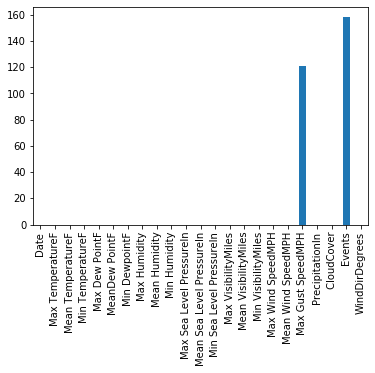

In [80]:
# Plot to see the number of NaN per column
weather.isna().sum().plot(kind="bar")

### Drop
Use `.dropna()` to drop missing values from our dataframe

In [89]:
# Remove duplicates and plot
cleaned_weather = weather.dropna()

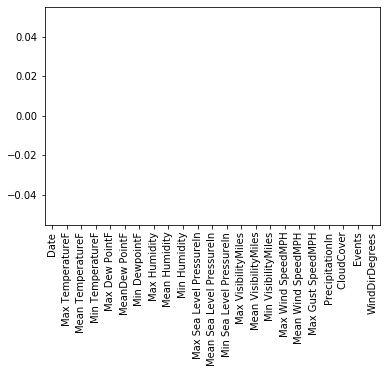

In [90]:
cleaned_weather.isna().sum().plot(kind="bar")

### Fill
Impute the missing values using `.fillna()`.

In [91]:
# Fill in missing values with 'missing'
weather_filled = weather.copy()
weather_filled['Events'] = weather_filled['Events'].fillna('missing')

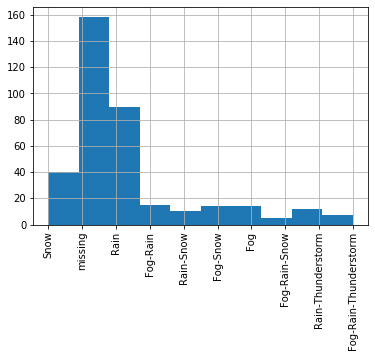

In [92]:
weather_filled['Events'].hist()
plt.xticks(rotation='vertical')
plt.show()

In [95]:
# Fill in missing values mean
print('Mean of the column:', weather_filled['Max Gust SpeedMPH'].mean())
weather_filled['Max Gust SpeedMPH'] = weather_filled['Max Gust SpeedMPH'].fillna(weather_filled['Max Gust SpeedMPH'].mean()) # 0

Mean of the column: 25.422131147541034


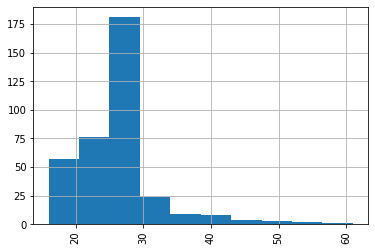

In [94]:
weather_filled['Max Gust SpeedMPH'].hist()
plt.xticks(rotation='vertical')
plt.show()

# Minimum edit distance
In this exercise, and throughout this chapter, you'll be working with the restaurants DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

Before doing so, you want to establish the cutoff point for the similarity score using the `fuzzywuzzy`'s `process.extract()` function by finding the similarity score of the most distant typo of each category.

In [98]:
from fuzzywuzzy import process

C:\Users\vilieri.i\AppData\Local\Continuum\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [135]:
restaurants = pd.read_csv('../data/26. Limpiando datos/restaurants_L2_dirty.csv')
restaurants.head()

,Unnamed: 0,name,addr,city,phone,type
0,0,kokomo,6333 w. third st.,la,2139330773,american
1,1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole


In [136]:
restaurants['type'] = restaurants['type'].replace('american', 'americano')
restaurants['type'] = restaurants['type'].replace('asian', 'asiatico')
restaurants['type'] = restaurants['type'].replace('italian', 'italiano')

In [137]:
# Store the unique values of cuisine_type in unique_types
unique_types = restaurants['type'].unique()
unique_types

array(['americano', 'californian', 'japanese', 'cajun/creole', 'hot dogs',
       'diners', 'delis', 'hamburgers', 'seafood', 'italiano',
       'coffee shops', 'russian', 'steakhouses', 'mexican/tex-mex',
       'noodle shops', 'mexican', 'middle eastern', 'asiatico',
       'vietnamese', 'health food', 'american ( new )',
       'pacific new wave', 'indonesian', 'eclectic', 'chicken',
       'fast food', 'southern/soul', 'coffeebar', 'continental',
       'french ( new )', 'desserts', 'chinese', 'pizza'], dtype=object)

In [141]:
print(process.extract('italian', unique_types, limit = len(unique_types)))

[('italiano', 93), ('californian', 56), ('continental', 51), ('indonesian', 47), ('russian', 43), ('mexican', 43), ('japanese', 40), ('asiatico', 40), ('mexican/tex-mex', 39), ('american ( new )', 39), ('pacific new wave', 39), ('americano', 38), ('vietnamese', 35), ('delis', 33), ('pizza', 33), ('diners', 31), ('middle eastern', 30), ('chicken', 29), ('chinese', 29), ('health food', 27), ('southern/soul', 27), ('cajun/creole', 26), ('steakhouses', 26), ('seafood', 14), ('hot dogs', 13), ('noodle shops', 13), ('eclectic', 13), ('french ( new )', 13), ('desserts', 13), ('hamburgers', 12), ('fast food', 12), ('coffeebar', 12), ('coffee shops', 0)]


You're going to put it all together by finding matches with similarity scores equal to or higher than 80 by using fuzywuzzy.process's `extract()` function, for each correct cuisine type, and replacing these matches with it. Remember, when comparing a string with an array of strings using process.extract(), the output is a list of tuples where each of tuple is as such:

`(closest match, similarity score, index of match)`

In [139]:
categories = ['asian', 'american', 'italian']
cuttoff = 50

# For each correct cuisine_type in categories
for cuisine in categories:
    
    # Find matches in cuisine_type of restaurants
    matches = process.extract(cuisine, restaurants['type'], 
                            limit = restaurants.shape[0])
  
    # For each possible_match with similarity score >= 80
    for possible_match in matches:
        if possible_match[1] >= cuttoff:
          # Find matching cuisine type
            matching_cuisine = restaurants['type'] == possible_match[0]
            restaurants.loc[matching_cuisine, 'new_type'] = cuisine

In [140]:
restaurants.head()

,Unnamed: 0,name,addr,city,phone,type,new_type
0,0,kokomo,6333 w. third st.,la,2139330773,americano,american
1,1,feenix,8358 sunset blvd. west,hollywood,2138486677,americano,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian,italian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese,asian
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole,NaN
